### Importing Libraries

In [535]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
import scipy as spi
from scipy.optimize import curve_fit

### Arithmetic with Uncertainty Functions

In [536]:
# When doing arithmetic on values with uncertainty, values should be formatted as
# tuple -> (value, statistical uncertainty, systematic uncertainty)


def addWithError(num1: tuple, num2: tuple, dependent:bool):

    if (dependent):
        return (num1[0] + num2[0], num1[1] + num2[1], num1[2] + num2[2])
    if not(dependent):
        return (num1[0] + num2[0], np.sqrt((num1[1]**2) + (num2[1]**2)), np.sqrt((num1[2]**2) + (num2[2]**2)))

def multiplyWithError(num1: tuple, num2: tuple, dependent: bool):

    if (dependent):
        return (num1[0]*num2[0], (num1[0]*num2[0])*((num1[1]/num1[0]) + (num2[1]/num2[0])), (num1[0]*num2[0])*((num1[2]/num1[0]) + (num2[2]/num2[0])))
    if not(dependent):
        return (num1[0]*num2[0], (num1[0]*num2[0])*np.sqrt(((num1[1]/num1[0])**2) + ((num2[1]/num2[0])**2)), (num1[0]*num2[0])*np.sqrt(((num1[2]/num1[0])**2) + ((num2[2]/num2[0])**2)))

def subtractWithError(num1: tuple, num2: tuple, dependent: bool):

    if (dependent):
        return (num1[0] - num2[0], num1[1] + num2[1], num1[2] + num2[2])
    if not(dependent):
        return (num1[0] - num2[0], np.sqrt((num1[1]**2) + (num2[1]**2)), np.sqrt((num1[2]**2) + (num2[2]**2)))

def divideWithError(num1: tuple, num2: tuple, dependent: bool):

    if (dependent):
        return (num1[0]/num2[0], (num1[0]/num2[0])*((num1[1]/num1[0]) + (num2[1]/num2[0])), (num1[0]/num2[0])*((num1[2]/num1[0]) + (num2[2]/num2[0])))
    if not(dependent):
        return (num1[0]/num2[0], (num1[0]/num2[0])*np.sqrt(((num1[1]/num1[0])**2) + ((num2[1]/num2[0])**2)), (num1[0]/num2[0])*np.sqrt(((num1[2]/num1[0])**2) + ((num2[2]/num2[0])**2)))

### Bin Width

In [537]:
#################
### TEST Mode ###
#################

trial = 0

if (trial == 0):

    # Repetition Rate in Hz (need to look into error of statistical erro of frequency fluctuations)
    repRate = (100.9*(10**3), 0.4*(10**3), 0)

    # Bin Counts [1, 2, 3, 4, 5, 6]
    channelCounts_NoError = [695, 1207, 1776, 2317, 2865, 3502]
    # Scalar Counts [A. B]
    scalarCounts_NoError = [6755, 102987859]

if (trial == 1):
    
    # Repetition Rate in Hz (need to look into error of statistical erro of frequency fluctuations)
    repRate = (109.8*(10**3), 0, 0.2*(10**3))

    # Bin Counts [1, 2, 3, 4, 5, 6]
    channelCounts_NoError = [679, 1170, 1761, 2264, 2787, 3347]
    # Scalar Counts [A. B]
    scalarCounts_NoError = [5914, 94267746]

if (trial == 2):
    
    # Repetition Rate in Hz (need to look into error of statistical erro of frequency fluctuations)
    repRate = (83.62*(10**3), 0, 0.2*(10**3))

    # Bin Counts [1, 2, 3, 4, 5, 6]
    channelCounts_NoError = [429, 795, 1200, 1556, 1899, 2338]
    # Scalar Counts [A. B]
    scalarCounts_NoError = [5972, 67631743]

In [538]:
def createCountError(counts: list[int]):
    withError = []
    for count in counts:
        withError.append((count, np.sqrt(count), 0))
    return withError

def createCountWithNoError(counts: list[int]):
    withNoError = []
    for count in counts:
        withNoError.append((count, 0, 0))
    return withNoError

channelCounts = createCountError(channelCounts_NoError)
scalarCounts = createCountError(scalarCounts_NoError)

In [539]:
channelTimes = []
for count in channelCounts:
    channelTimes.append(divideWithError(count, multiplyWithError(repRate, scalarCounts[0], False), True))

binWidths = []
for i, count in enumerate(channelTimes):
    if (i==0):
        binWidths.append(count)
    else:
        binWidths.append(subtractWithError(count, channelTimes[i-1], False))

In [540]:
scalarCounts

[(6755, 82.18880702382776, 0), (102987859, 10148.293403326492, 0)]

In [541]:
binWidths

[(1.0196902929152065e-06, 5.1727680473037853e-08, 0.0),
 (7.511963021188284e-07, 8.9987375437682e-08, 0.0),
 (8.34825577940651e-07, 1.203340979114179e-07, 0.0),
 (7.937445301685279e-07, 1.4860273441158335e-07, 0.0),
 (8.040147921115586e-07, 1.7473871850785517e-07, 0.0),
 (9.345938368158075e-07, 2.0196067064092075e-07, 0.0)]

### Fitting Observed Data

In [542]:
################
### RUN Mode ###
################

# Run 1 - 10/3/2022 15:49 to 10/3/2022 16:58
counts1 = np.array([45, 71, 92, 105, 114, 120])
scalar1 = np.array([27448, 26698])

# Run 2 - 10/4/2022 16:37 to 10/17/2022 9:55
counts2 = np.array([8714, 13241, 16784, 18747, 20134, 21256])
scalar2 = np.array([6361196, 619867])

# Run 3 - 10/17/2022 9:55 to 10/19/2022 15:38
counts3 = np.array([1748, 2615, 3312, 3704, 3990, 4186])
scalar3 = np.array([125282, 1221273])

countsTotalNoError = counts1 + counts2 + counts3
scalarTotalNoError = scalar1 + scalar2 + scalar3

countsTotal = createCountError(countsTotalNoError)

yData = []
for i, count in enumerate(countsTotal):
    if (i==0):
        yData.append(count)
    else:
        yData.append(subtractWithError(count, countsTotal[i-1], False))

In [543]:
def getValues(values: list[tuple], type: str):
    strMap = {"val": 0, "stat": 1, "sys": 2}
    return list(map(lambda x: x[strMap[type]], values))

In [544]:
xData = np.array([1, 2, 3, 4, 5, 6])

yDataNoError = getValues(yData, "val")
yDataError = getValues(yData, "stat")

binWidthsNoError = getValues(binWidths, "val")
binWidthsError = getValues(binWidths, "stat")


N = sum(yDataNoError)

# i goes from 0 to 5
def fit_function(data, l):

    start = 0

    top = lambda t1, t2: (-N*l)*(np.exp(-t2/l) - np.exp(-t1/l))
    bottom = lambda t1, t2: (-l)*(np.exp(-t2/l) - np.exp(-t1/l))

    return_data = []
    times = [start]
    for i, width in enumerate(binWidthsNoError):
        times.append(times[i] + width)

    for i in data:

        # print(f'Integrate from {times[int(i)-1]} to {times[int(i)]}')
        a = top(times[int(i)-1], times[int(i)])
        b = bottom(times[0], times[6])
        return_data.append(a / b)

    return return_data

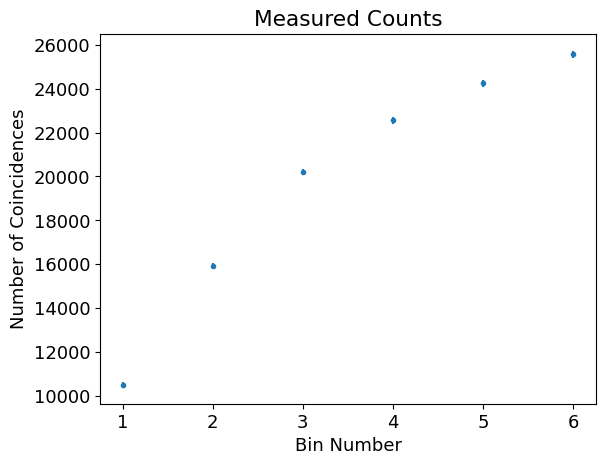

In [545]:
plt.errorbar(xData, getValues(countsTotal, "val"), yerr=getValues(countsTotal, "stat"), fmt='.')
plt.xlabel("Bin Number")
plt.ylabel("Number of Coincidences")
plt.title("Measured Counts")
plt.show()

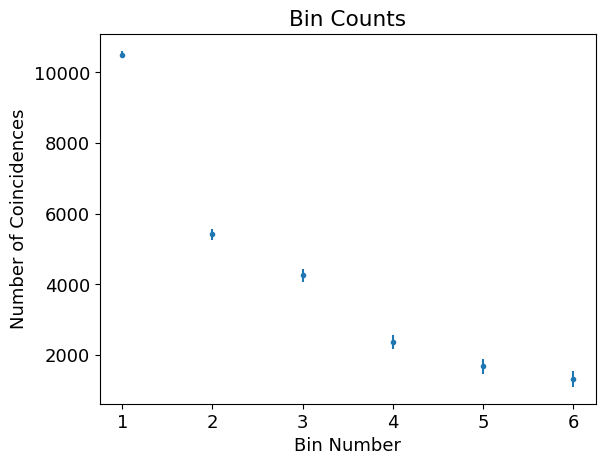

In [546]:
plt.errorbar(xData, yDataNoError, yerr=yDataError, fmt='.')
plt.xlabel("Bin Number")
plt.ylabel("Number of Coincidences")
plt.title("Bin Counts")
plt.show()

In [547]:
# Adjusted y error for uncertainty in both variables
l0 = 2.19703*(10**(-6))
bottom = lambda t1, t2: (np.exp(-t2/l0) - np.exp(-t1/l0))
denom = bottom(0, channelTimes[5][0])

adjustedyError = []
for i, data in enumerate(xData):
    if (i==0):
        adjustedyError.append(np.sqrt((( ((-N/l0)*(np.exp(-(channelTimes[i][0])/l0) ))/denom )**2)*((binWidthsError[i])**2) + ((yDataError[i])**2)))
    else:
        adjustedyError.append(np.sqrt((( ((-N/l0)*(np.exp(-(channelTimes[i][0])/l0) ))/denom )**2)*((binWidthsError[i])**2) + ((yDataError[i])**2)))

#- np.exp(0)
#- np.exp(-(channelTimes[i-1][0])/l0)

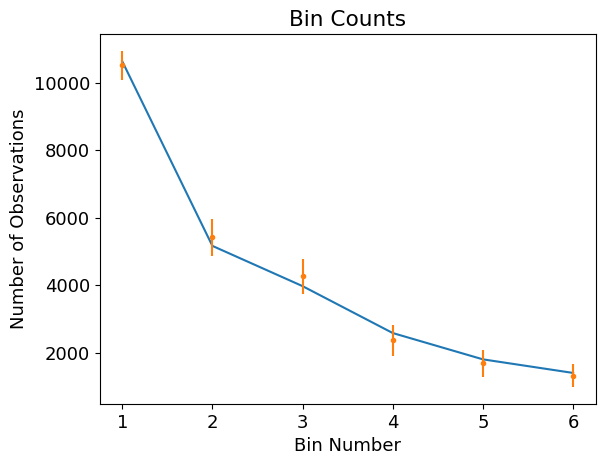

fitted parameters: [2.14790093e-06]


In [548]:
# some initial parameter values - must be withib bounds
initialParameters = np.array([2.19703])*(10**(-6))

# bounds on parameters - initial parameters must be within bounds
lowerBounds = 0.00000000001
upperBounds = np.Inf
parameterBounds = [lowerBounds, upperBounds]

fittedParameters, pcov = curve_fit(fit_function, xData, yDataNoError, initialParameters, bounds=parameterBounds, sigma=adjustedyError)

l = fittedParameters

# for plotting the fitting results
y_plot = fit_function(xData, l)

# plt.plot(xData, yData, 'D') # plot the raw data as a scatterplot
plt.plot(xData, y_plot) # plot the equation using the fitted parameters
plt.errorbar(xData, yDataNoError, yerr=adjustedyError, fmt='.')
plt.xlabel("Bin Number")
plt.ylabel("Number of Observations")
plt.title("Bin Counts")
plt.rc('font', size=13)
plt.show()

print('fitted parameters:', fittedParameters)

In [549]:
decay_eff = (l[0], np.sqrt(np.diag(pcov))[0], 0)

l_eff = divideWithError((1, 0, 0), decay_eff, False)

gamma_capture = (3.76*(10**4), 0, 0.4*(10**4))

r = (1.18, 0, 0.12)

In [550]:
decay_eff

(2.1479009312401087e-06, 6.108687402669029e-08, 0)

In [551]:
decay_vac = divideWithError((1,0,0), subtractWithError(l_eff, divideWithError(gamma_capture, addWithError((1,0,0), r, False), False), True), False)
decay_vac

(2.230534111373752e-06, 6.587750576082734e-08, 1.0278635922045876e-08)